<a href="https://colab.research.google.com/github/olivemideva/python_scripts/blob/main/NLP%26Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%ls

drive/  sample_data/


In [ ]:
import pandas as pd

df_main = pd.read_csv('/content/drive/MyDrive/datasets/LAB3.csv')

df1 = df_main.copy()
df1.head(5)


,product,narrative
0,mortgages_and_loans,applied mortgage refinance understand process ...
1,debt_collection,received letter demanding payment medical debt...
2,debt_collection,car accident fault year old financial help use...
3,debt_collection,bad financial shape stemming bad employment si...
4,debt_collection,reliant capital solution repeatly call spouse ...


In [ ]:
!pip install nltk -q
!pip install stopwordsiso
!pip install spacy -q
!pip install datasets -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
print(df1.shape)

df1.dropna(inplace = True)

print(df1.shape)

(71242, 2)
(71139, 2)


In [ ]:
#cleaning
df1['narrative'] = df1['narrative'].str.replace("@", "")
df1['narrative'] = df1['narrative'].str.replace("#", "")
df1['narrative'] = df1['narrative'].str.replace("\d+", "")
df1['narrative'] = df1['narrative'].str.replace("http\S+|www.\S+", "")
df1['narrative'] = df1['narrative'].str.lower()

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


,product,narrative
0,mortgages_and_loans,applied mortgage refinance understand process ...
1,debt_collection,received letter demanding payment medical debt...
2,debt_collection,car accident fault year old financial help use...
3,debt_collection,bad financial shape stemming bad employment si...
4,debt_collection,reliant capital solution repeatly call spouse ...


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['label'] = le.fit_transform(df1['product'])
df1.head()

,product,narrative,label
0,mortgages_and_loans,applied mortgage refinance understand process ...,2
1,debt_collection,received letter demanding payment medical debt...,1
2,debt_collection,car accident fault year old financial help use...,1
3,debt_collection,bad financial shape stemming bad employment si...,1
4,debt_collection,reliant capital solution repeatly call spouse ...,1


In [ ]:
df1['label'].value_counts()

1    23114
2    18965
0    15545
3    13515
Name: label, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as Tfidf
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df1.head(15)

,product,narrative,label
0,mortgages_and_loans,applied mortgage refinance understand process ...,2
1,debt_collection,received letter demanding payment medical debt...,1
2,debt_collection,car accident fault year old financial help use...,1
3,debt_collection,bad financial shape stemming bad employment si...,1
4,debt_collection,reliant capital solution repeatly call spouse ...,1
5,debt_collection,called company numerous time debt mine sent th...,1
6,debt_collection,mentioned debt collecting agency sent letter d...,1
7,credit_card,late fee accumulated nearly extra fee deferred...,0
8,credit_card,purchased ticket cancelled event requested ref...,0
9,debt_collection,national service bureau threatened jail time r...,1


In [ ]:
df1['narrative'].iloc[15]

'may concern take corrective action believe square capital may making change customer account customer notification order generate additional fee show growth service management approximately day ago square changed business account balance transfer policy automated daily transfer manually requested change generates added fee staff make request square contacted claimed made change computer mystery today received following unsolicited email square hello purposely blank received square card order card arrive shipping address provided within day purposely blank send confirmation email card ship thanks square team request debit card square wife person admin credential account square notified error stated could requested debit card asked ip address request made square declined red flag believe square may knowingly making change client account initiating additional service effort show company growth detriment client please investigate contact directly additional detail'

In [ ]:
x = df1['narrative']
y = df1['label']

tfidf = Tfidf(ngram_range=(1,1), max_features = 1000, stop_words = 'english')
x = tfidf.fit_transform (x.values.astype('U'))

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.4, random_state = 28)

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
print("The accuracy in Random Forest is : ", accuracy_score(y_test, y_pred))

The accuracy in Random Forest is :  0.7812412145066067


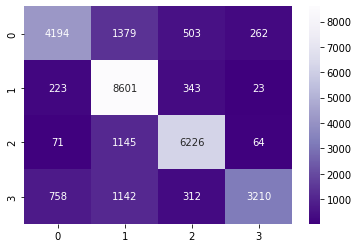

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples_r")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72      6338
           1       0.70      0.94      0.80      9190
           2       0.84      0.83      0.84      7506
           3       0.90      0.59      0.71      5422

    accuracy                           0.78     28456
   macro avg       0.81      0.75      0.77     28456
weighted avg       0.80      0.78      0.78     28456

